In [15]:
from scipy.integrate import odeint
from scipy import arange
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [26]:
### Hindmarsh-Rose Model Class
class hindmarshRose:
    ## Must be in same order as dXdt return
    label = ['x', 'y', 'z']
    nVar = len(label)

    ## Parameters
    p = {
    'a' : 1.0,
    'b' : 3.0,
    'c' : 1.0,
    'd' : 5.0,
    'r' : 0.5e-3,
    's' : 4.0,
    'xR': -1.6,
    'I' : 2.0
    }

    ## Get initial values for the system
    def __init__(self, X0 = [0.3, 0.2, 0.1]):
        self.name = self.__class__.__name__
        if self.nVar != len(X0):
            print 'ERROR:', self.nVar, 'initial values required for:', self.name
        else: 
            self.X0 = X0
            
            
    def phi(self, x): return - self.p['a']*x**3 + self.p['b']*x**2
    def psi(self, x): return self.p['c'] - self.p['d']*x**2
         
    ## Define the dX/dt for the system
    def dXdt(self, X, t):
        x, y, z = X

        dxdt = y + self.phi(x) - z + self.p['I']
        dydt = self.psi(x) - y
        dzdt = self.p['r']*(self.p['s']*(x - self.p['xR']) - z)

        return dxdt, dydt, dzdt

In [27]:
## Time interval of the simulations
t = arange(0.0, 40.0, 0.01)
m = hindmarshRose()

## Solving the diffential equations
sol = odeint(m.dXdt, m.X0, t)

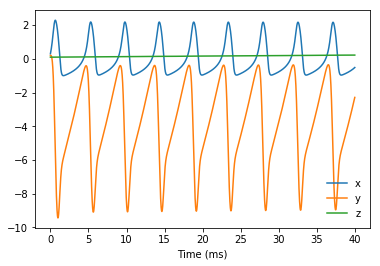

In [28]:
## Plot solution timeseries
fig, ax = plt.subplots()
for i, v in enumerate(m.label):
    figY = plt.plot(t, sol[:,i], label=v)
    

plt.xlabel('Time (ms)')
plt.legend(frameon=False)
plt.show()

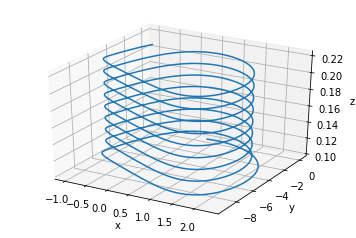

In [29]:
## Phase portrait
fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = sol.T
ax.plot(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()